In [180]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [181]:
#csv = "/Users/alexandranava/Desktop/Spores/Analysis/sensitivity_featurestd.csv"
csv = "/Users/alexandranava/Desktop/Spores/Analysis/sensitivity_gaussian.csv"

df = pd.read_csv(csv)
print(df.columns)
true_model_accuracy = 94.4444

Index(['Feature', 'Accuracy', 'STD', 'Delta x'], dtype='object')


### Feature Sensitivity Analysis

In [182]:
df["Change Accuracy"] = true_model_accuracy - df["Accuracy"]
df["SI"] = df["Change Accuracy"]/df["Delta x"]

[ 1  2  5 10 20]


([<matplotlib.axis.YTick at 0x2879e0e50>,
 [Text(0, 0, '0%'),
  Text(0, 20, '20%'),
  Text(0, 40, '40%'),
  Text(0, 60, '60%'),
  Text(0, 80, '80%'),
  Text(0, 100, '100%')])

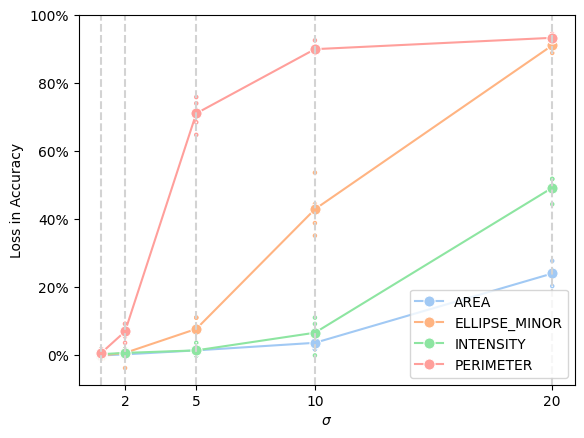

In [183]:
sigmas = df["STD"].unique()
print(sigmas)


feature_colors = sns.color_palette("pastel", (len(df["Feature"].unique())))
mean_changeaccuracy_df = df.groupby(["Feature", "STD"])["Change Accuracy"].mean().reset_index()
sns.lineplot(data=mean_changeaccuracy_df, x="STD", y="Change Accuracy", hue="Feature", marker="o", palette="pastel", markersize = 8)

color_index = 0
for feature, group in df.groupby(["Feature"]):
  plt.scatter(group["STD"], group["Change Accuracy"], color=feature_colors[color_index], facecolors = "none", s= 5)
  color_index += 1

#vertical line at each std 
for sigma in list(sigmas):
  plt.axvline(sigma, color = "lightgrey", linestyle = "--")
plt.legend(loc = "best")

#xaxis formatting
plt.xlabel(r"$\sigma$")
plt.xticks(sigmas[1:])
#yaxis formatting
plt.ylabel(r"Loss in Accuracy")
plt.yticks([0, 20, 40, 60, 80, 100], ["0%", "20%", "40%", "60%", "80%", "100%"])

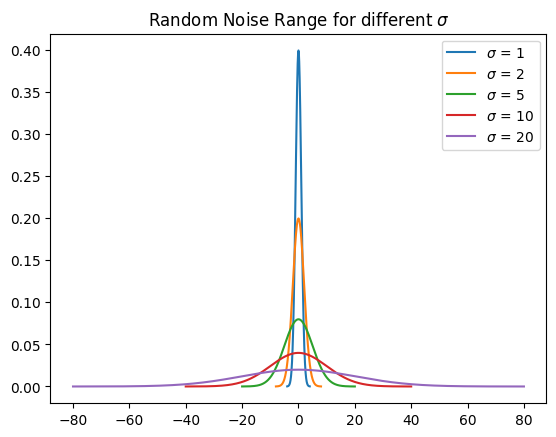

In [184]:
from scipy.stats import norm
for std_val in sigmas:
     mean = 0 
     x = np.linspace(mean - 4*std_val, mean + 4*std_val, 1000)
     y = norm.pdf(x, 0, std_val)
     plt.plot(x, y, label=f'$\sigma$ = {std_val}')
plt.title(rf"Random Noise Range for different $\sigma$")
plt.legend()
plt.show()
plt.close()

### Temporal Sensitivity Analysis 

In [185]:
tsa_path = "/Users/alexandranava/Desktop/Spores/Analysis/temporal_sensitivity.csv"
tsa_df = pd.read_csv(tsa_path)

Index(['Feature', 'Accuracy', 'TimeRange', 'Gaussian Noise Sigma'], dtype='object')


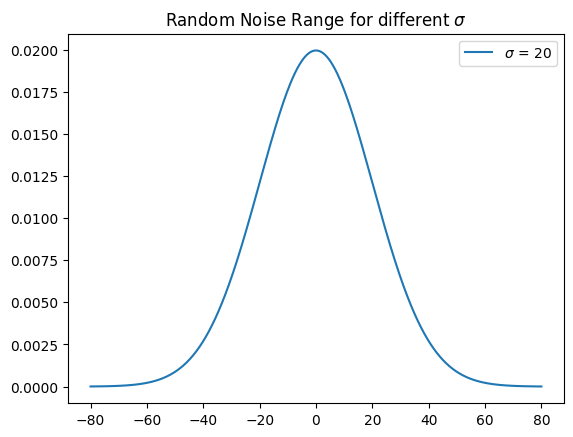

In [186]:
from scipy.stats import norm
print(tsa_df.columns)
tsa_sigmas = tsa_df["Gaussian Noise Sigma"].unique()

for std_val in tsa_sigmas:
     mean = 0 
     x = np.linspace(mean - 4*std_val, mean + 4*std_val, 1000)
     y = norm.pdf(x, 0, std_val)
     plt.plot(x, y, label=f'$\sigma$ = {std_val}')
plt.title(rf"Random Noise Range for different $\sigma$")
plt.legend()
plt.show()
plt.close()


Index(['Feature', 'Accuracy', 'TimeRange', 'Gaussian Noise Sigma'], dtype='object')
['[-10, 0]' '[-3, 0]' '[-5, 0]' '[0, 10]' '[0, 3]' '[0, 5]']
['Last 10', 'Last 3', 'Last 5', 'First  10', 'First  3', 'First  5']


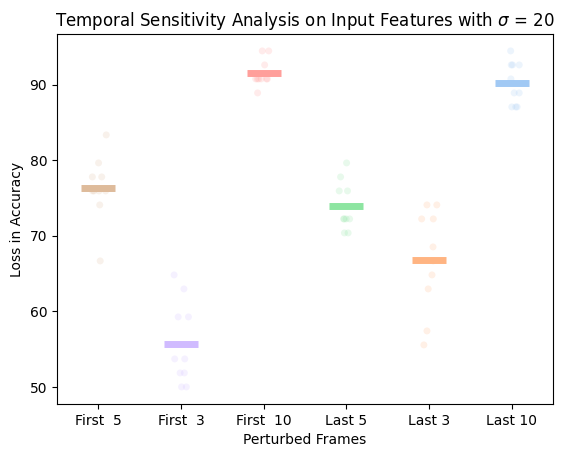

In [187]:
print(tsa_df.columns)
def plot_temporal_sensitivity_accuracy(df):

    # Sort the DataFrame by "TimeRange"
    df = df.sort_values("TimeRange")

    # Calculate the loss in accuracy
    df["Loss in Accuracy"] = true_model_accuracy - df["Accuracy"]

    sns.stripplot(x = "TimeRange", y = "Loss in Accuracy", data = df, label="Accuracy Loss", alpha = .2, hue = "TimeRange", palette = "pastel")
    sns.pointplot(x = "TimeRange", y = "Loss in Accuracy", data = df, errorbar = None, linestyle = "none", marker = "_", hue = "TimeRange", markeredgewidth = 5, markersize = 25, palette = "pastel")

    x_labels = []
    for time_range in df["TimeRange"].unique():
        time_range = time_range.replace("[", "")
        time_range = time_range.replace("]", "")
        time_range = time_range.split(",")

        if int(time_range[0]) == 0:
            x_labels.append(f"First {time_range[1]}")
        if int(time_range[1]) == 0:
            time_range[0] = time_range[0].replace("-", "")
            x_labels.append(f"Last {time_range[0]}")
        
    print(df["TimeRange"].unique())
    print(x_labels)
    plt.xticks(df["TimeRange"].unique(), x_labels)
    # Label the axes
    plt.xlabel("Perturbed Frames")
    plt.ylabel("Loss in Accuracy")
    plt.gca().invert_xaxis()
    plt.title(rf"Temporal Sensitivity Analysis on Input Features with $\sigma$ = {sigma}")
    
plot_temporal_sensitivity_accuracy(tsa_df)

  